In [1]:
# Data Science tools
import numpy as np
import pandas as pd

# Data Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install plotly
import plotly.express as px
#!pip install sweetviz
import sweetviz as sv
from pandas.plotting import scatter_matrix
from datetime import datetime, timedelta,date
import time
import calendar

# Scikit-Learn Library
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Evaluation Metric Libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.shape

(541909, 8)

In [4]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [5]:
data.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,12/9/2011 12:50,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,12/9/2011 12:50,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,12/9/2011 12:50,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/2011 12:50,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [8]:
data.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custome

In [9]:
data.describe().style.background_gradient(cmap="Blues")  # "Method"

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


                                             |                                             | [  0%]   00:00 ->…


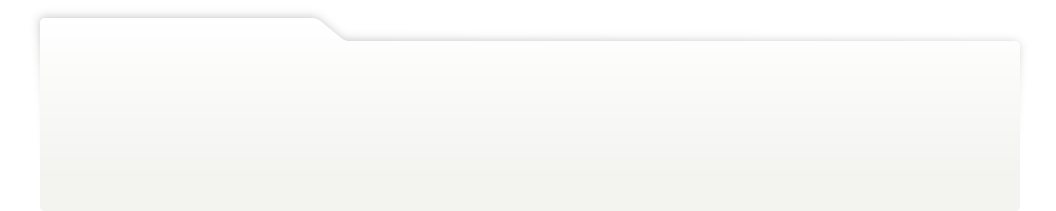
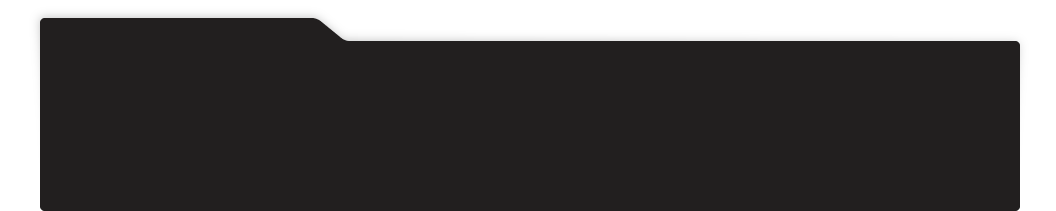
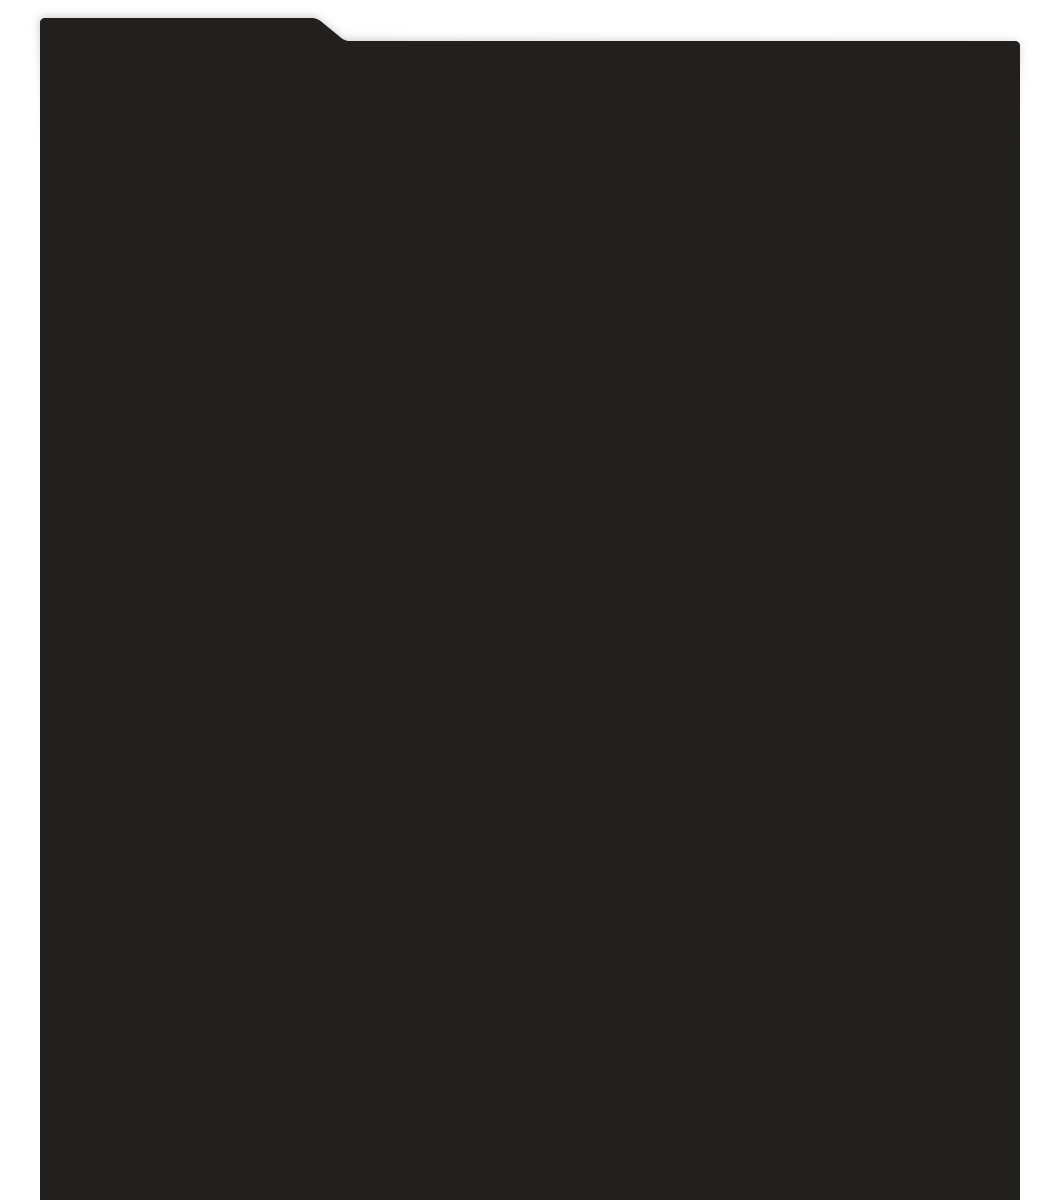
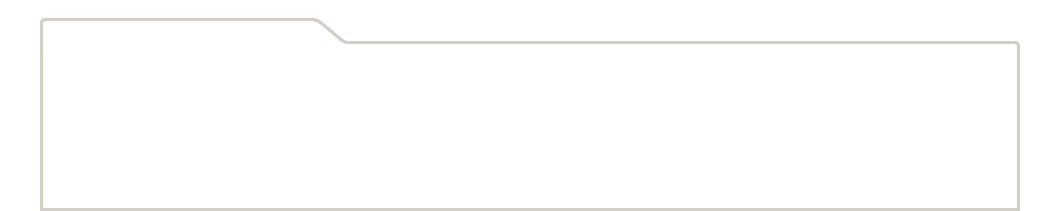
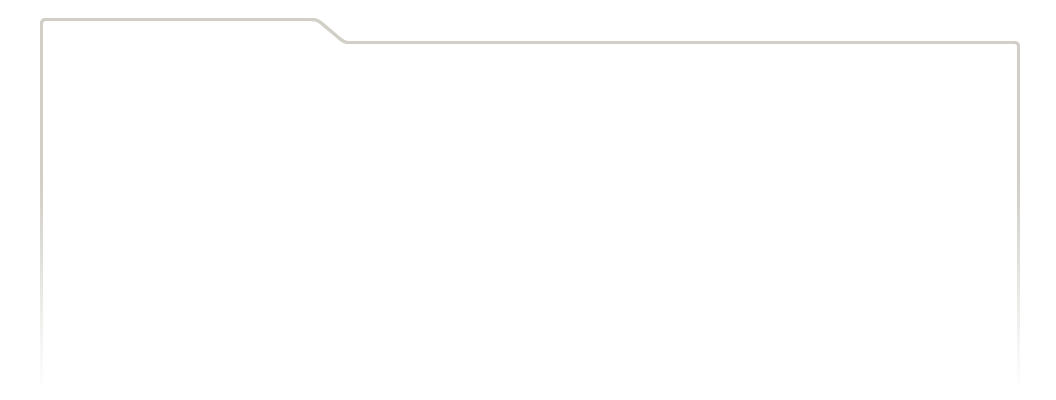
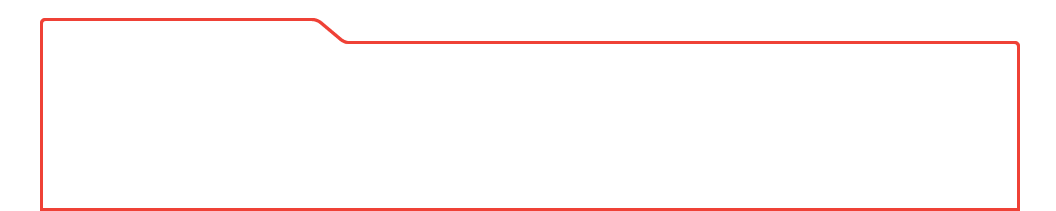
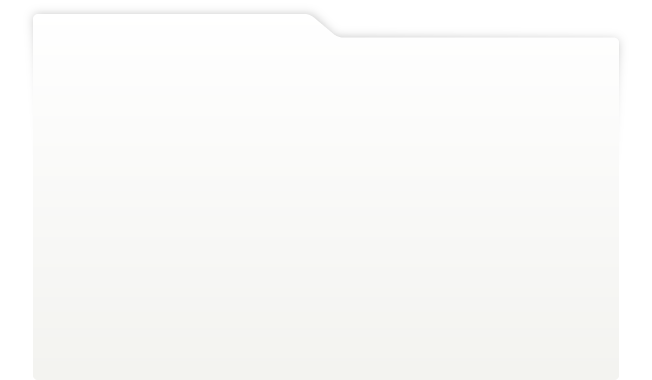
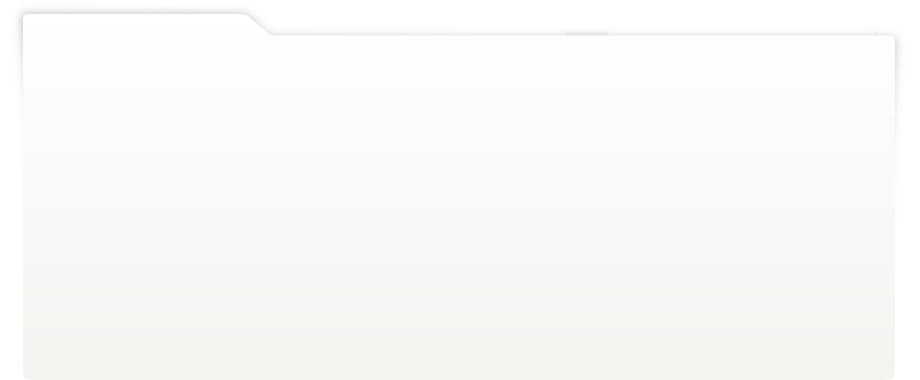
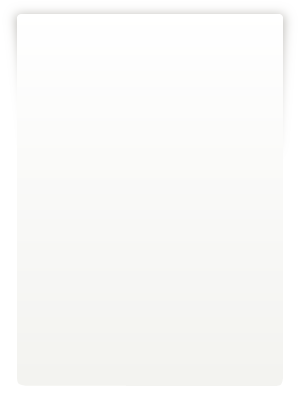
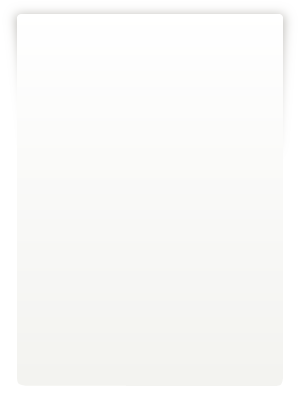
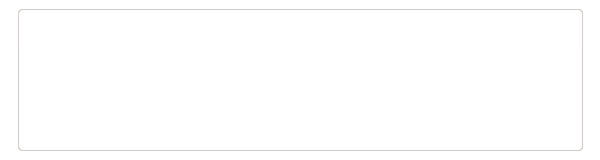
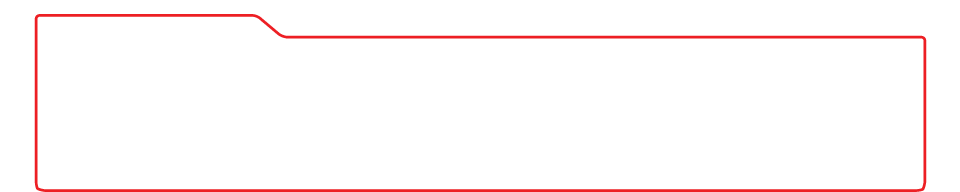
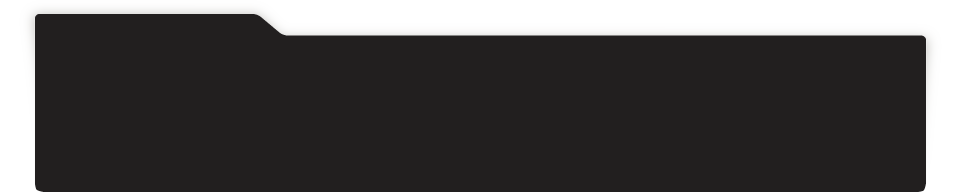
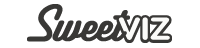
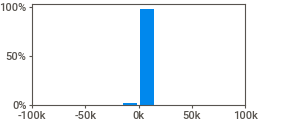
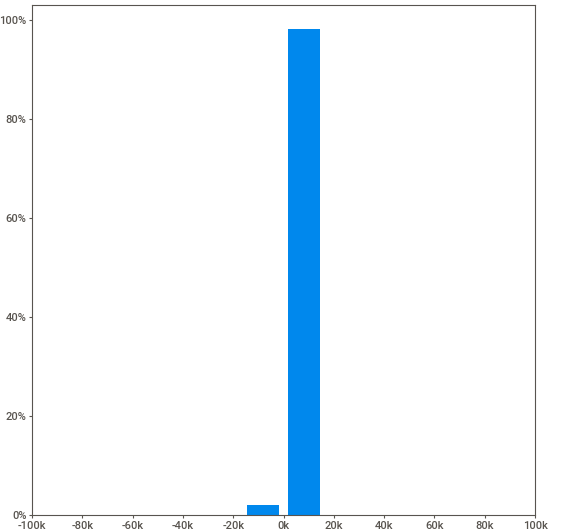
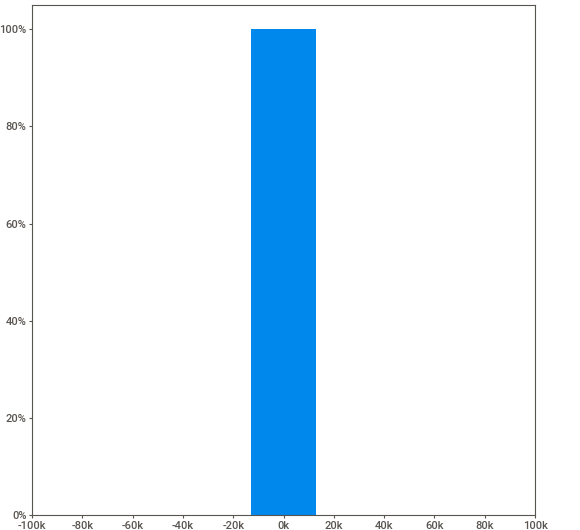
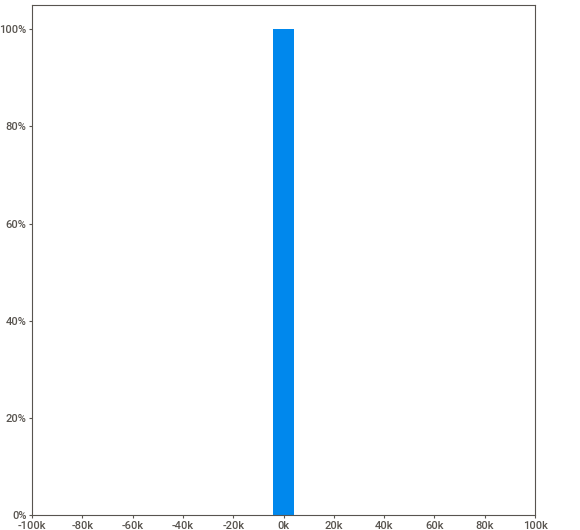
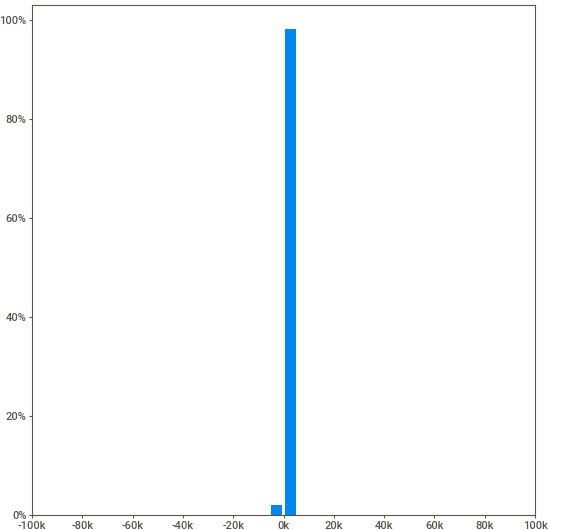
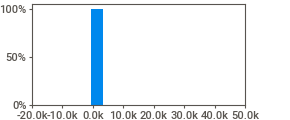
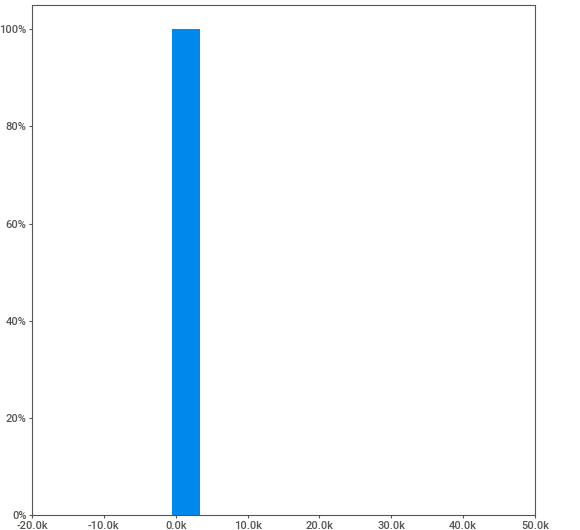
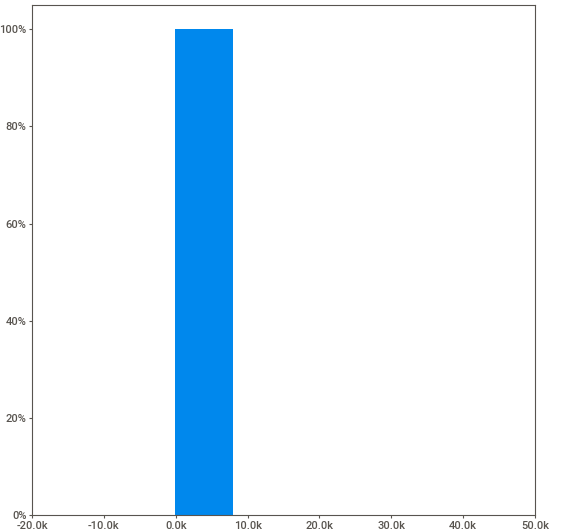
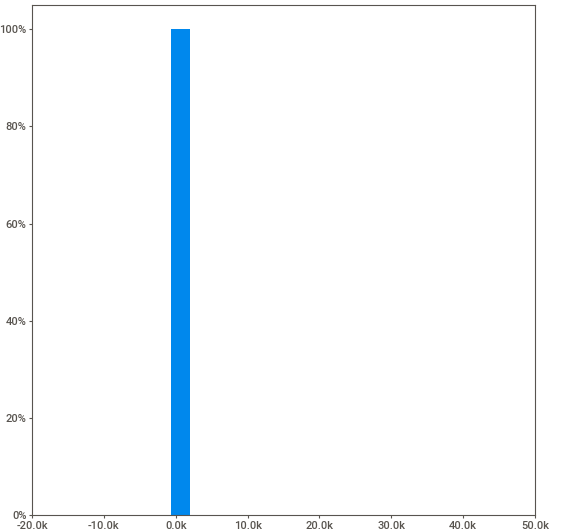
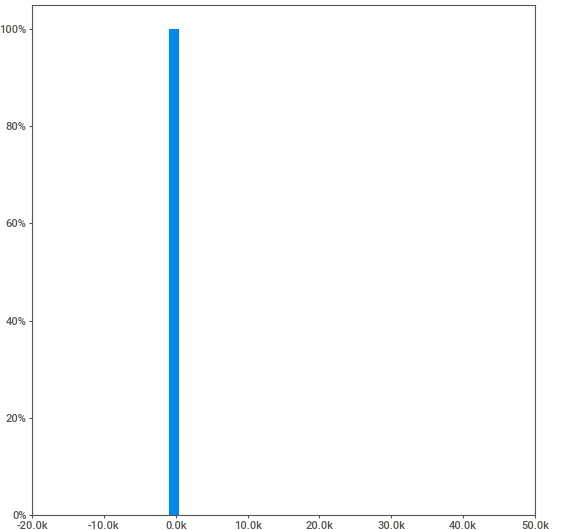
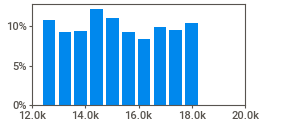
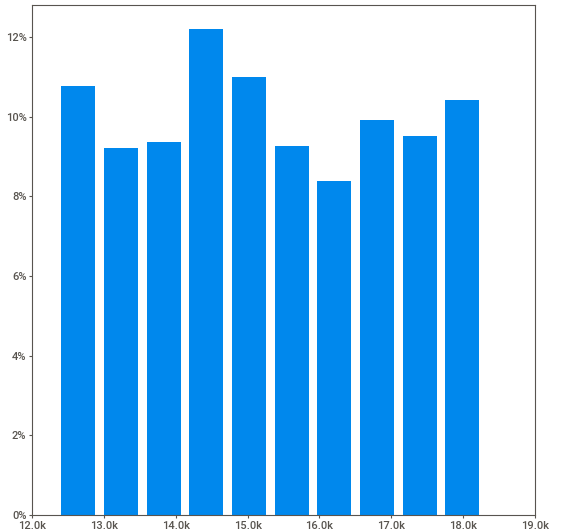
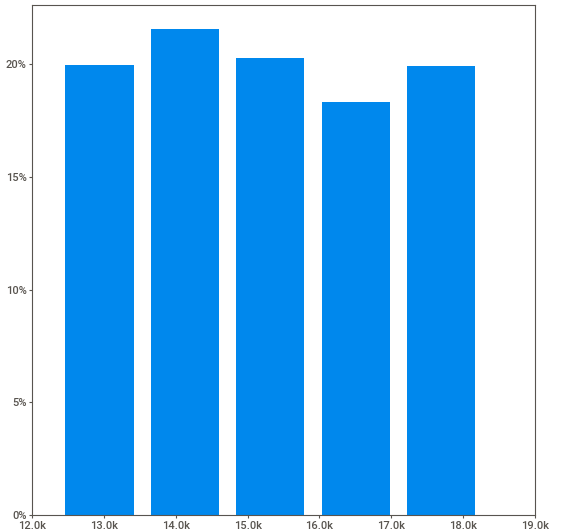
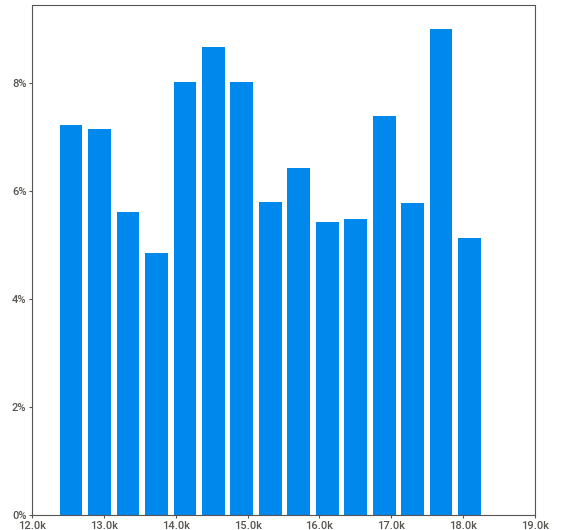
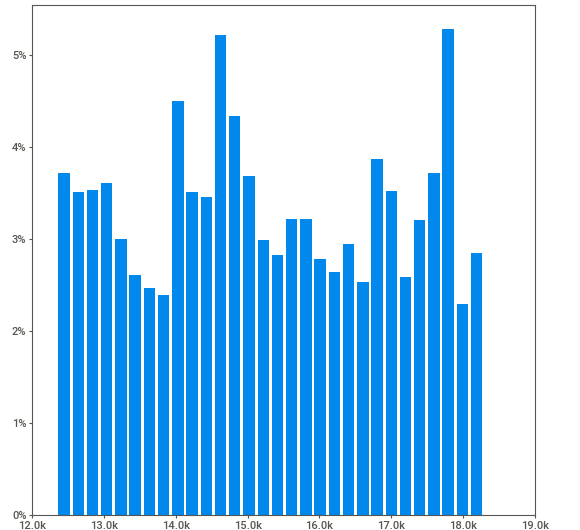
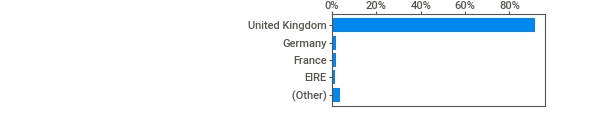
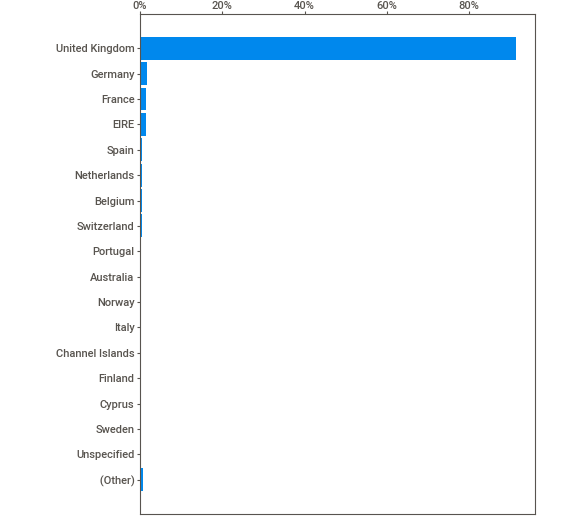
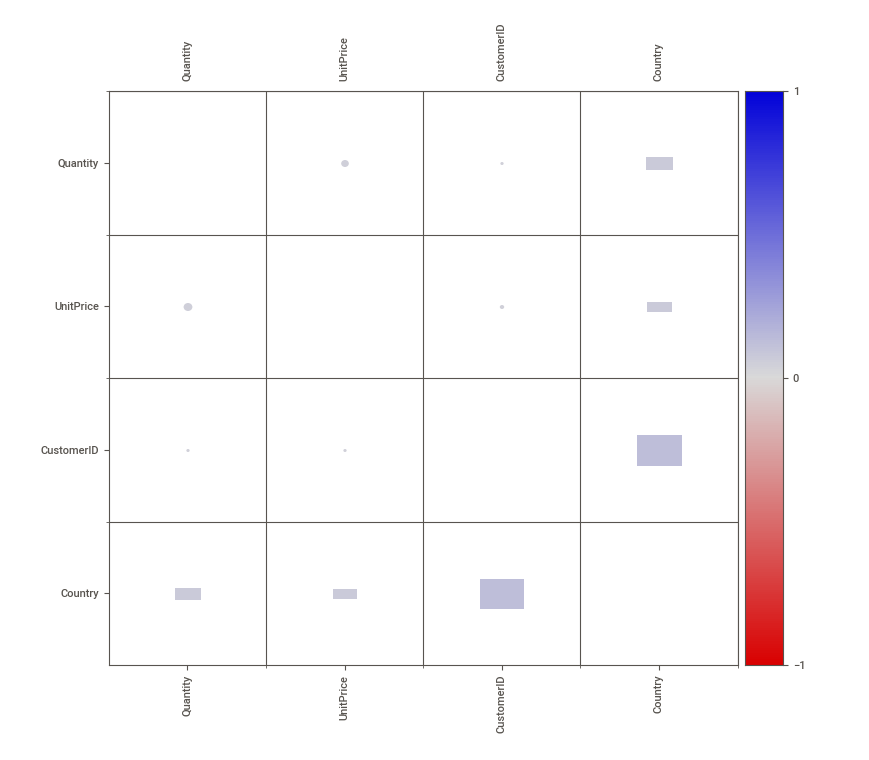
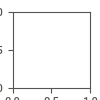

In [10]:
My_Report = sv.analyze(data)
My_Report.show_notebook(w=None, h=None, scale=None, layout="widescreen", filepath=None)

In [11]:
if data.isnull().values.any():
    print("Unfortunately, there are missing values in the dataset\n") 
else:
    print("Fortunately, there aren't missing values in the dataset.")

Unfortunately, there are missing values in the dataset



In [12]:
data.fillna(0, inplace=True)

In [13]:
if data.isnull().values.any():
    print("Unfortunately, there are missing values in the dataset\n") 
else:
    print("Fortunately, there aren't missing values in the dataset.")

Fortunately, there aren't missing values in the dataset.


In [14]:
# Z-Score Normalization 
# Calculate Z-scores for each feature

Z_Scores = (data - data.mean()) / data.std()
Threshold = 3    # Is a commonly used standard
Outliers = (Z_Scores > Threshold) | (Z_Scores < -Threshold)

# Check if there are any outliers
if Outliers.any().any():
    print("Outliers detected in the dataset. Removing them...")
    
    # Remove Outliers
    Data = data[~Outliers.any(axis=1)]
    Data.reset_index(drop=True, inplace=True)
    
    print("Outliers removed. Data shape:", Data.shape)
else:
    print("No outliers detected in the dataset.")

Outliers detected in the dataset. Removing them...
Outliers removed. Data shape: (541189, 8)


In [15]:
Data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [16]:
# Calculating the Missing Values % contribution in Data

Data_null = round(100*(Data.isnull().sum())/len(Data), 2)
Data_null

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [17]:
print("Summary Statistics:")
print(Data.describe())

Summary Statistics:
            Quantity      UnitPrice     CustomerID
count  541189.000000  541189.000000  541189.000000
mean        9.264344       3.514863   11481.409121
std        26.297254       7.360663    6775.412671
min      -635.000000       0.000000       0.000000
25%         1.000000       1.250000   12357.000000
50%         3.000000       2.080000   14383.000000
75%        10.000000       4.130000   16255.000000
max       660.000000     293.080000   18287.000000


In [18]:
Data.drop(Data[(Data['Quantity'] <0)].index, inplace=True)
print(Data.describe())

            Quantity      UnitPrice     CustomerID
count  530795.000000  530795.000000  530795.000000
mean        9.765493       3.472191   11457.132952
std        25.387942       6.961868    6794.129755
min         1.000000       0.000000       0.000000
25%         1.000000       1.250000       0.000000
50%         3.000000       2.080000   14379.000000
75%        10.000000       4.130000   16261.000000
max       660.000000     293.000000   18287.000000


In [19]:
Data.shape

(530795, 8)

In [20]:
Data["CustomerID"].value_counts()

0.0        133168
17841.0      7847
14911.0      5675
14096.0      5099
12748.0      4594
            ...  
16953.0         1
18068.0         1
17291.0         1
15070.0         1
16881.0         1
Name: CustomerID, Length: 4325, dtype: int64

In [21]:
Data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [22]:
Cancel_Orders = Data["InvoiceNo"].apply(str).str.startswith("C").sum()
print(f"Number of cancel orders = {Cancel_Orders}" )

Number of cancel orders = 0


In [23]:
#drop cancel order 
Data_1=Data[(Data['UnitPrice']>0) & (Data['Quantity']>0)]
Data_1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541184,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541185,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541186,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541187,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


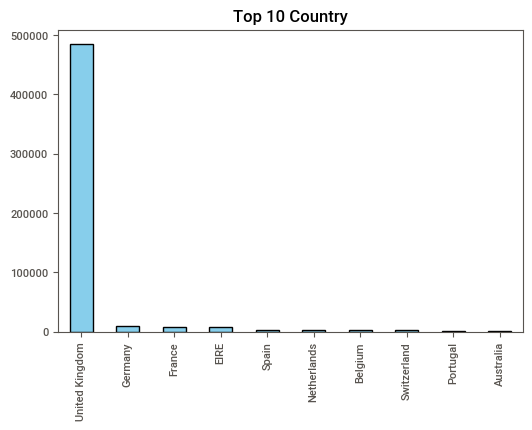

In [24]:
Data_1['Country'].value_counts().head(10).plot(kind='bar',color ='skyblue',edgecolor='black')
plt.title('Top 10 Country') 
plt.show()

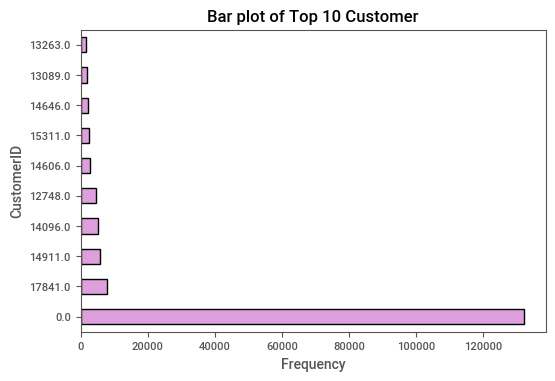

In [25]:
Data_1['CustomerID'].value_counts().head(10).plot(kind='barh',color ='plum',edgecolor='black')
plt.title('Bar plot of Top 10 Customer')
plt.xlabel('Frequency')
plt.ylabel('CustomerID')
plt.show()

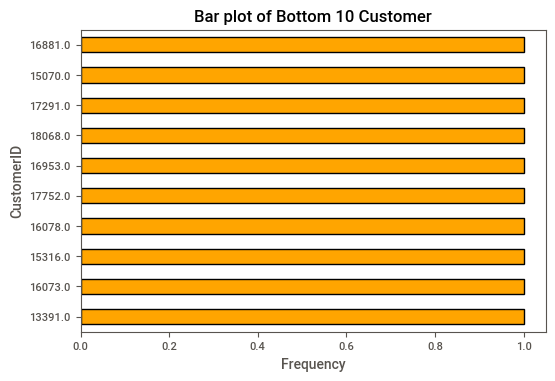

In [26]:
Data_1['CustomerID'].value_counts().tail(10).plot(kind='barh',color ='orange',edgecolor='black')
plt.title('Bar plot of Bottom 10 Customer')
plt.xlabel('Frequency')
plt.ylabel('CustomerID')
plt.show()

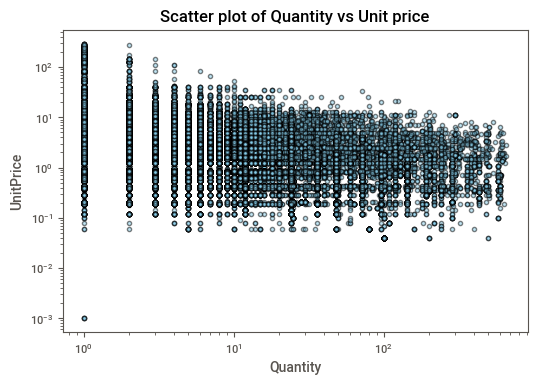

In [27]:
plt.scatter(Data_1['Quantity'],Data_1['UnitPrice'],color='skyblue',edgecolor='black',alpha=0.5)
plt.title('Scatter plot of Quantity vs Unit price')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [28]:
popularity_of_product = Data_1.pivot_table(
    index=['StockCode','Description'],
    values='Quantity',
    aggfunc='sum').sort_values(
    by='Quantity',ascending = False)
print('Top 10 popular product')
popularity_of_product.head(10)

Top 10 popular product


,,Quantity
StockCode,Description,
85099B,JUMBO BAG RED RETROSPOT,45274
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,35079
85123A,WHITE HANGING HEART T-LIGHT HOLDER,31737
84879,ASSORTED COLOUR BIRD ORNAMENT,31413
21212,PACK OF 72 RETROSPOT CAKE CASES,30659
22197,POPCORN HOLDER,23519
22492,MINI PAINT SET VINTAGE,23223
22178,VICTORIAN GLASS HANGING T-LIGHT,22384
23084,RABBIT NIGHT LIGHT,22076


Text(0, 0.5, 'Item')

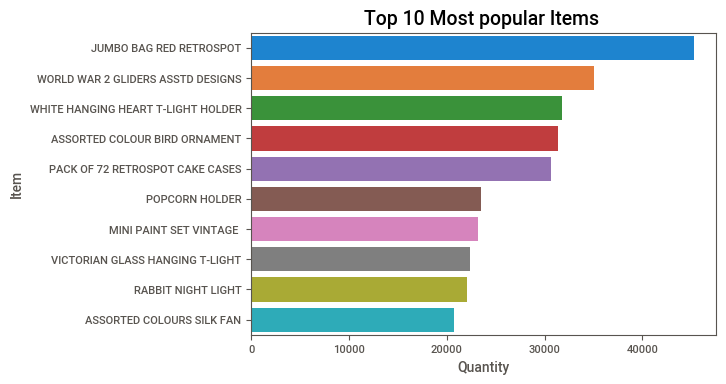

In [29]:
popularity_of_product.reset_index(inplace = True)
sns.barplot(y='Description',x='Quantity',data =popularity_of_product.head(10))
plt.title('Top 10 Most popular Items ',fontsize=14)
plt.ylabel('Item')

In [30]:
Top_n_Customer = Data_1.pivot_table(
    index=['InvoiceNo','CustomerID'],
    values='Quantity',
    aggfunc='sum').sort_values(
    by='Quantity',ascending = False)
print('Top 10 Customer')
popularity_of_product.head(10)

Top 10 Customer


,StockCode,Description,Quantity
0,85099B,JUMBO BAG RED RETROSPOT,45274
1,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,35079
2,85123A,WHITE HANGING HEART T-LIGHT HOLDER,31737
3,84879,ASSORTED COLOUR BIRD ORNAMENT,31413
4,21212,PACK OF 72 RETROSPOT CAKE CASES,30659
5,22197,POPCORN HOLDER,23519
6,22492,MINI PAINT SET VINTAGE,23223
7,22178,VICTORIAN GLASS HANGING T-LIGHT,22384
8,23084,RABBIT NIGHT LIGHT,22076
9,15036,ASSORTED COLOURS SILK FAN,20706


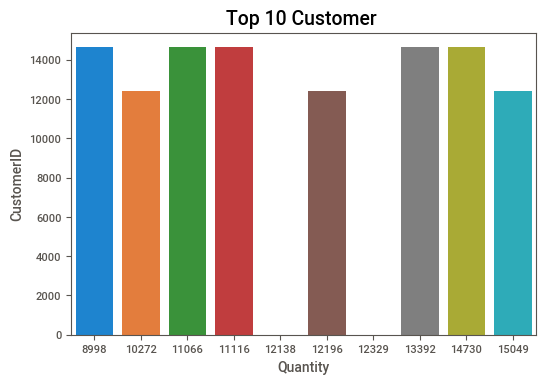

In [31]:
Top_n_Customer.reset_index(inplace = True)
sns.barplot(y='CustomerID',x='Quantity',data =Top_n_Customer.head(10))
plt.title('Top 10 Customer ',fontsize=14)
plt.show()

In [32]:
Data_1.loc[Data_1.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
540955,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
540969,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
540972,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
540979,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [33]:
# Assume Invoice No is Unique
Data_1.query("InvoiceNo == '581538'").groupby("Description")["Description"].count().sort_values(ascending=False)

Description
PINK  HONEYCOMB PAPER FAN              2
SET OF 20 VINTAGE CHRISTMAS NAPKINS    2
SET OF 3 BUTTERFLY COOKIE CUTTERS      2
SET OF 3 HANGING OWLS OLLIE BEAK       2
ROLL WRAP VINTAGE CHRISTMAS            2
                                      ..
LADS ONLY TISSUE BOX                   1
LUNCH BAG  BLACK SKULL.                1
LUNCH BAG RED RETROSPOT                1
MODERN FLORAL STATIONERY SET           1
WRAP BILLBOARD FONTS DESIGN            1
Name: Description, Length: 61, dtype: int64

In the Data_1 dataset duplicates acknowledged are very less in number as compared to the whole dataset, therefore, it is ok to keep them, as they won't affect the performance percentage by a large scale.

In [34]:
#check for negative values
Data_1.query("Quantity < 0")
Data_1.query("UnitPrice <= 0")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [35]:
#Changing invoice Date Data Type
Data_1['InvoiceDate'] = pd.to_datetime(Data_1['InvoiceDate'])

Data_1['DayCode'] = Data_1['InvoiceDate'].dt.dayofweek
Data_1['DateYMD'] = Data_1["InvoiceDate"].dt.date
Data_1['DateYM'] = Data_1['InvoiceDate'].dt.to_period('M')
Data_1['Day'] = Data_1['InvoiceDate'].dt.day_name()
Data_1['TotalPrice']= Data_1['Quantity'] * Data_1['UnitPrice']
Data_1.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
DayCode                 int64
DateYMD                object
DateYM              period[M]
Day                    object
TotalPrice            float64
dtype: object

In [36]:
Data_1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayCode,DateYMD,DateYM,Day,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2,2010-12-01,2010-12,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,2010-12-01,2010-12,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2,2010-12-01,2010-12,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,2010-12-01,2010-12,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,2010-12-01,2010-12,Wednesday,20.34


# Data Preparation using RFM

We are going to analysis the Customers based on below 3 factors:

1.R (Recency): Number of days since last purchase

2.F (Frequency): Number of transactions

3.M (Monetary): Total amount of transactions (revenue contributed)

In [37]:
#............RECENCY..........
Data_1['InvoiceDate'] = pd.to_datetime(Data_1['InvoiceDate'],format = '%d-%m-%Y %H:%M')
max_date = max(Data_1['InvoiceDate'])
Data_1['Recency'] = max_date - Data_1['InvoiceDate']
Data_1['Recency'] = Data_1['Recency'].dt.days     #to get number of days only
rfm_r = Data_1.groupby('CustomerID')['Recency'].min()
rfm_r = rfm_r.reset_index()
rfm_r.head()

,CustomerID,Recency
0,0.0,0
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [38]:
#.........Frequency............
rfm_f = Data_1.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns=['CustomerID','Frequency']
rfm_f.head()

,CustomerID,Frequency
0,0.0,132047
1,12347.0,182
2,12348.0,31
3,12349.0,72
4,12350.0,17


In [39]:
#...........Monetory............
Data_1['Monetory'] = Data_1['Quantity']*Data_1['UnitPrice']
rfm_m = Data_1.groupby('CustomerID')['Monetory'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Monetory
0,0.0,1.588145e+06
1,12347.0,4.310000e+03
2,12348.0,1.797240e+03
3,12349.0,1.457550e+03
4,12350.0,3.344000e+02


In [40]:
#.......Merging the data set to get final RFM.........
rfm = pd.merge(rfm_m ,rfm_f,on = 'CustomerID', how= 'inner')
rfm.head()

,CustomerID,Monetory,Frequency
0,0.0,1.588145e+06,132047
1,12347.0,4.310000e+03,182
2,12348.0,1.797240e+03,31
3,12349.0,1.457550e+03,72
4,12350.0,3.344000e+02,17


In [41]:
rfm = pd.merge(rfm , rfm_r ,how = 'inner')
rfm.head()

,CustomerID,Monetory,Frequency,Recency
0,0.0,1.588145e+06,132047,0
1,12347.0,4.310000e+03,182,1
2,12348.0,1.797240e+03,31,74
3,12349.0,1.457550e+03,72,18
4,12350.0,3.344000e+02,17,309


<AxesSubplot:>

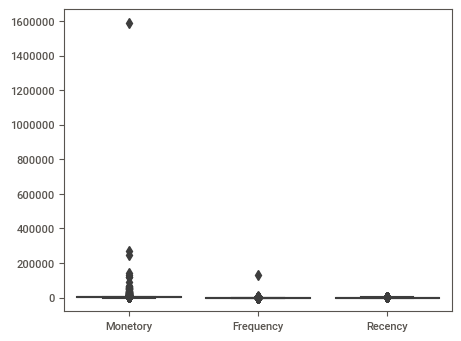

In [42]:
#Outlier Detecion of RFM
attributes = ['Monetory','Frequency','Recency']
plt.rcParams['figure.figsize']=[5,4]

sns.boxplot(data=rfm[attributes])

In [43]:
# REMOVING OUTLIERS
# for Recency
Q1 = rfm.Recency.quantile(0.25)
Q3 = rfm.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# for Frequency
Q1 = rfm.Frequency.quantile(0.25)
Q3 = rfm.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

# for Amount(monetory)
Q1 = rfm.Monetory.quantile(0.25)
Q3 = rfm.Monetory.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Monetory >= Q1 - 1.5*IQR) & (rfm.Monetory <= Q3 + 1.5*IQR)]

<AxesSubplot:>

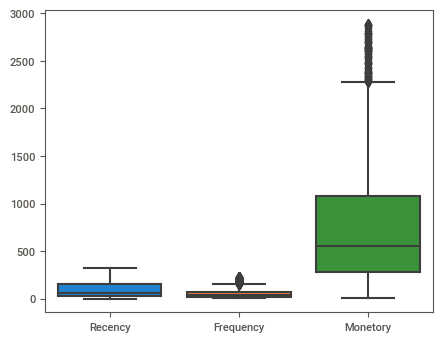

In [44]:
attributes =['Recency','Frequency','Monetory']
plt.rcParams['figure.figsize'] = [5,4]
sns.boxplot(data=rfm[attributes])

In [45]:
#rescaling the attribes 
rfm_1 = rfm[['Recency','Frequency','Monetory']]

scaler = StandardScaler()
rfm_2 = scaler.fit_transform(rfm_1)
rfm_2.shape

(3500, 3)

In [46]:
rfm_3 = pd.DataFrame(rfm_2)
rfm_3.columns = ['Recency', 'Frequency', 'Monetory']
rfm_3.head()

,Recency,Frequency,Monetory
0,-0.204606,-0.397214,1.547296
1,-0.826555,0.498353,1.034396
2,2.405361,-0.703017,-0.661455
3,-0.637749,0.760471,2.049037
4,1.228100,-0.986977,-1.031986


In [47]:
print(rfm_3.describe(include='all'))

            Recency     Frequency      Monetory
count  3.500000e+03  3.500000e+03  3.500000e+03
mean   1.554312e-17  8.366324e-17 -1.690711e-16
std    1.000143e+00  1.000143e+00  1.000143e+00
min   -1.026467e+00 -1.052507e+00 -1.161989e+00
25%   -7.821301e-01 -7.467032e-01 -7.471910e-01
50%   -3.823054e-01 -3.535274e-01 -3.318726e-01
75%    6.172563e-01  4.328241e-01  4.619339e-01
max    2.594167e+00  3.927720e+00  3.195373e+00


In [48]:
rfm_4 = rfm_3.loc[rfm_3['Recency'] >= 0, :]
rfm_4 = rfm_4.loc[rfm_4['Frequency'] >= 0, :]
rfm_4 = rfm_4.loc[rfm_4['Monetory'] >= 0, :]

In [49]:
print(rfm_4.describe(include='all'))

          Recency   Frequency    Monetory
count  148.000000  148.000000  148.000000
mean     0.771018    0.840021    0.943043
std      0.634700    0.784289    0.750598
min      0.006413    0.017805    0.006860
25%      0.236868    0.230775    0.390417
50%      0.600597    0.607569    0.724178
75%      1.186451    1.202793    1.280963
max      2.494211    3.600074    3.048671


In [50]:
rfm_4.shape

(148, 3)

In [51]:
rfm_4.head()

,Recency,Frequency,Monetory
5,1.539074,0.192550,0.463425
20,2.460892,0.607569,1.291940
24,1.017081,1.088117,1.627804
33,0.284069,0.214393,0.507590
37,0.617256,0.105178,1.416160


In [52]:
# Create RFM score
rfm_4['RFM_Score'] = rfm_4['Recency'].astype(str) + rfm_4['Frequency'].astype(str) + rfm_4['Monetory'].astype(str)

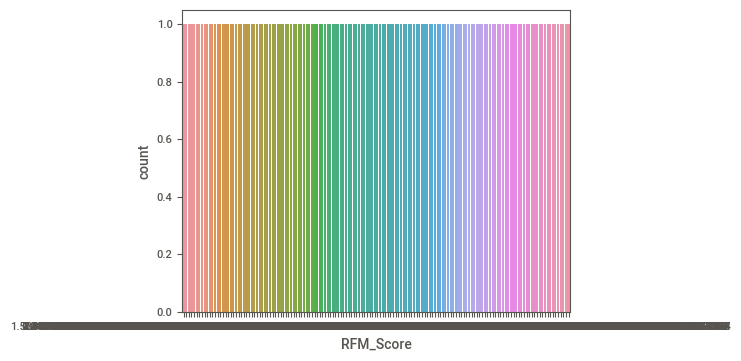

In [53]:
# Visualize RFM scores
sns.countplot(x='RFM_Score', data=rfm_4)
plt.show()

In [54]:
# Perform RFM segmentation
def rfm_segmentation(rfm_4):
    # Segment Recency
    rfm_4['R'] = pd.qcut(rfm_4['Recency'], 5, labels=[5, 4, 3, 2, 1], duplicates='drop')
    
    # Segment Frequency
    rfm_4['F'] = pd.qcut(rfm_4['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5], duplicates='drop')
    
    # Segment Monetary
    rfm_4['M'] = pd.qcut(rfm_4['Monetory'], 5, labels=[1, 2, 3, 4, 5], duplicates='drop')
    
    # Calculate RFM Score
    rfm_4['RFM_Score'] = rfm_4['R'].astype(str) + rfm_4['F'].astype(str) + rfm_4['M'].astype(str)
    
    return rfm_4

# Segment customers
rfm_5 = rfm_segmentation(rfm_4)

# Display the first few rows
rfm_5.head(15)

,Recency,Frequency,Monetory,RFM_Score,R,F,M
5,1.539074,0.192550,0.463425,122,1,2,2
20,2.460892,0.607569,1.291940,134,1,3,4
24,1.017081,1.088117,1.627804,245,2,4,5
33,0.284069,0.214393,0.507590,422,4,2,2
37,0.617256,0.105178,1.416160,315,3,1,5
92,1.927793,0.039648,0.370234,112,1,1,2
106,0.417344,0.301766,0.478192,422,4,2,2
137,1.561287,0.826000,1.913991,145,1,4,5
166,1.316950,0.804157,2.885948,235,2,3,5
191,0.639469,1.109960,1.261153,344,3,4,4


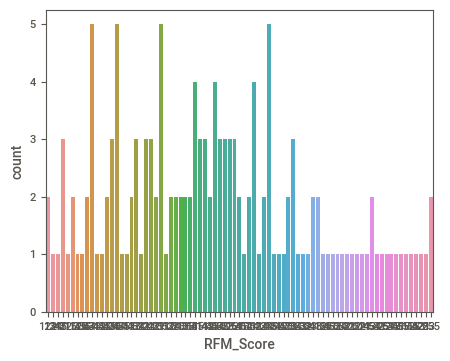

In [55]:
# Visualize RFM scores
sns.countplot(x='RFM_Score', data=rfm_5)
plt.show()

In [56]:
# Export to CSV for Power BI
rfm_4.to_csv('rfm_4.csv', index=False)

In [57]:
# Export to CSV for Power BI
Data_1.to_csv('Data_1.csv', index=False)

In [58]:
if rfm_5.isnull().values.any():
    print("Unfortunately, there are missing values in the dataset\n") 
else:
    print("Fortunately, there aren't missing values in the dataset.")

Fortunately, there aren't missing values in the dataset.


Gross merchandise value (GMV) is often used to determine the health of an e-commerce site's business because its revenue will be a function of gross merchandise sold and fees charged. It is most useful as a comparative measure over time, such as current quarter value versus previous quarter value.

<AxesSubplot:xlabel='DateYM'>

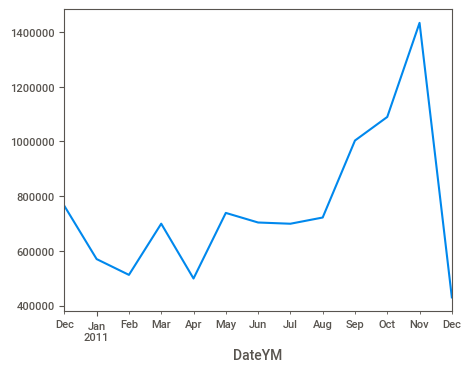

In [73]:
#GMV monthly
Data_1.groupby('DateYM')['TotalPrice'].sum().plot()

In [75]:
top10_gmvcountry = Data_1.groupby("Country")['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()
top10_gmvcountry

,Country,TotalPrice
0,United Kingdom,8.293525e+06
1,EIRE,2.757707e+05
2,Netherlands,2.741318e+05
3,Germany,2.263816e+05
4,France,1.986242e+05
5,Australia,1.350561e+05
6,Spain,6.157711e+04
7,Switzerland,5.708990e+04
8,Belgium,4.119634e+04
9,Sweden,3.705833e+04


Text(0, 0.5, 'Transaction Value')

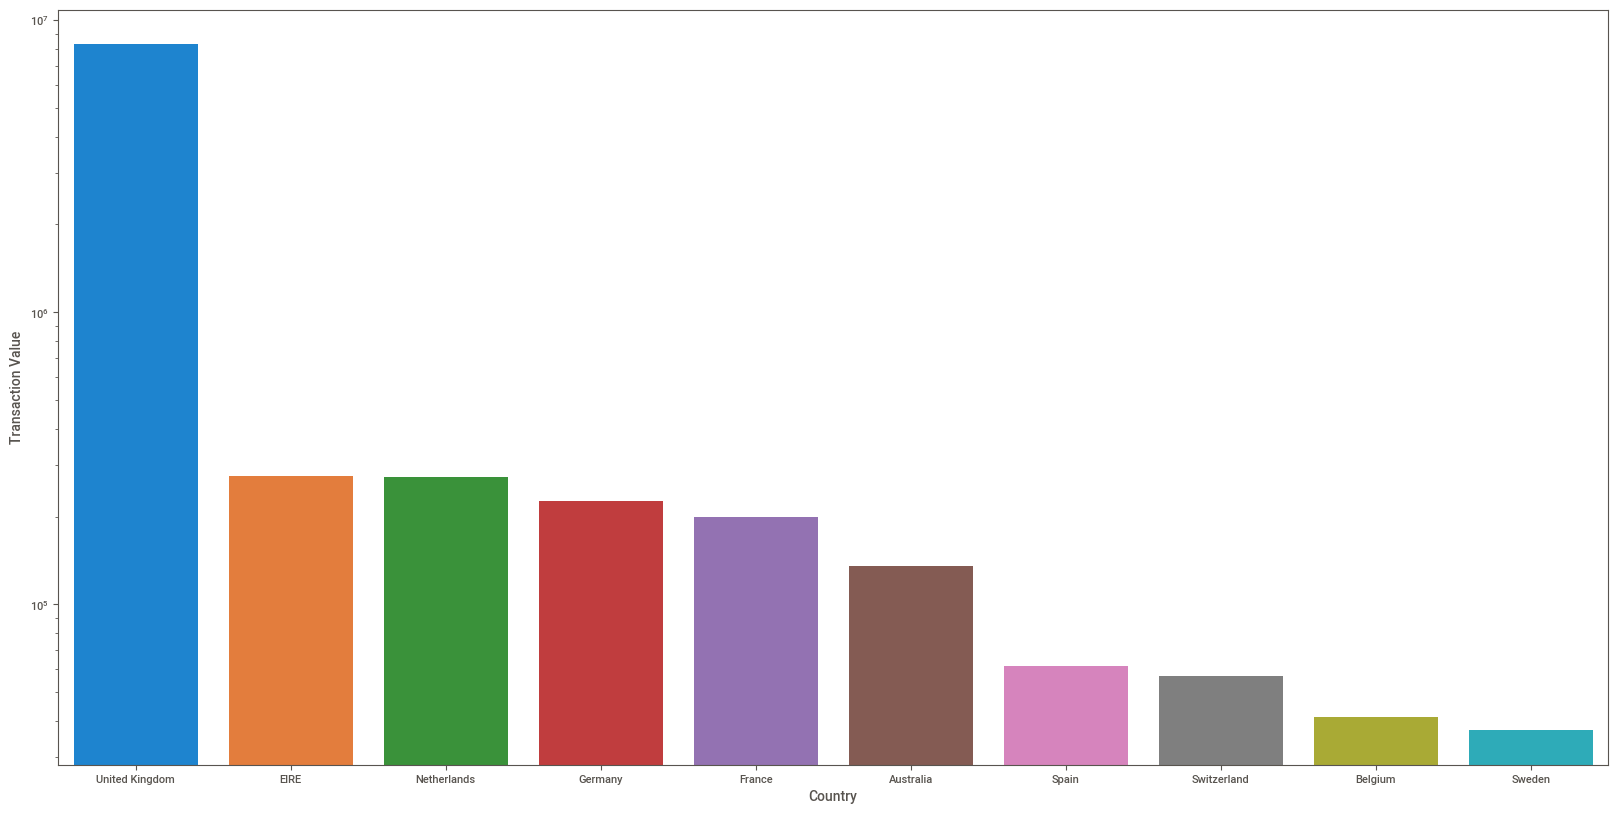

In [76]:
ax = sns.barplot(data=top10_gmvcountry, x="Country", y="TotalPrice")
plt.yscale("log")
ax.figure.set_size_inches(20,10)
ax.set_ylabel("Transaction Value")

# K-Means Clustering

In [77]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_5)

KMeans(max_iter=50, n_clusters=4)

In [78]:
kmeans.labels_

array([0, 0, 3, 2, 3, 0, 2, 0, 3, 2, 1, 3, 2, 2, 2, 3, 2, 2, 1, 0, 1, 2,
       1, 0, 3, 2, 3, 3, 1, 1, 3, 3, 3, 0, 3, 1, 2, 3, 0, 2, 1, 2, 2, 1,
       1, 1, 0, 0, 0, 0, 1, 2, 3, 0, 2, 0, 3, 1, 2, 2, 1, 3, 2, 0, 0, 3,
       3, 0, 3, 2, 2, 0, 3, 3, 1, 2, 2, 3, 3, 2, 2, 2, 2, 0, 2, 1, 2, 0,
       3, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 1, 0, 3, 2, 3, 2, 2, 1, 0,
       1, 3, 2, 3, 0, 0, 2, 2, 1, 2, 1, 3, 2, 0, 1, 2, 3, 0, 2, 1, 2, 2,
       2, 3, 1, 0, 0, 3, 1, 1, 2, 2, 3, 2, 3, 3, 0, 3])

Text(0, 0.5, 'Intertia')

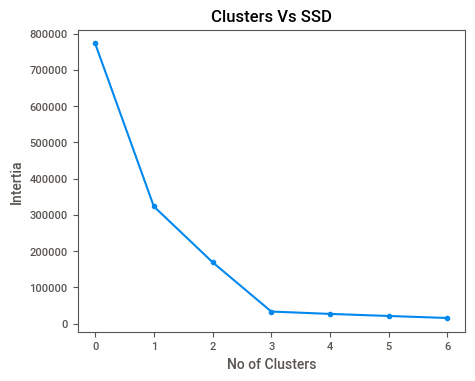

In [80]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_5)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd, marker='o')
plt.title('Clusters Vs SSD')
plt.xlabel('No of Clusters')
plt.ylabel('Intertia')

Now, silhouette analysis will be used to assess the quality of the clusters after the model is fit.

The equation of Silhouette is: 𝑆𝑖𝑙ℎ𝑜𝑢𝑒𝑡𝑡𝑒 𝑠𝑐𝑜𝑟𝑒 = 𝑝−𝑞 / 𝑚𝑎𝑥(𝑝,𝑞) Where, P is the mean distance of the closest cluster where it is not a member of the data point. In relation to its own cluster, q is the mean intra cluster distance to all the points. The value of this score varies from -1 to 1. Which is closer to 1, is very similar in its own cluster to the other point. It is not identical to the data points in its cluster when the score is -1

In [81]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_5)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_5, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6231705076438072
For n_clusters=3, the silhouette score is 0.6542654600532724
For n_clusters=4, the silhouette score is 0.6422524219174601
For n_clusters=5, the silhouette score is 0.8041300462354396
For n_clusters=6, the silhouette score is 0.783998345985901
For n_clusters=7, the silhouette score is 0.7676011542235694
For n_clusters=8, the silhouette score is 0.7452611033666338


In [82]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_5)

KMeans(max_iter=50, n_clusters=3)

In [83]:
kmeans.labels_

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1,
       2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 1, 2,
       2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 1, 0, 1, 1, 2, 0,
       2, 0, 1, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 0, 1, 2, 1, 1,
       1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0])

In [84]:
rfm_5['Cluster_Id'] = kmeans.labels_
rfm_5.head()

,Recency,Frequency,Monetory,RFM_Score,R,F,M,Cluster_Id
5,1.539074,0.192550,0.463425,122,1,2,2,0
20,2.460892,0.607569,1.291940,134,1,3,4,0
24,1.017081,1.088117,1.627804,245,2,4,5,0
33,0.284069,0.214393,0.507590,422,4,2,2,1
37,0.617256,0.105178,1.416160,315,3,1,5,1


In [102]:
print(silhouette_score(X=rfm_5, labels=rfm_5['Cluster_Id']))

0.6542774222693948


Value is closer to 1: The point is well-matched to its cluster and far away from points in other clusters.

<AxesSubplot:xlabel='Cluster_Id', ylabel='Monetory'>

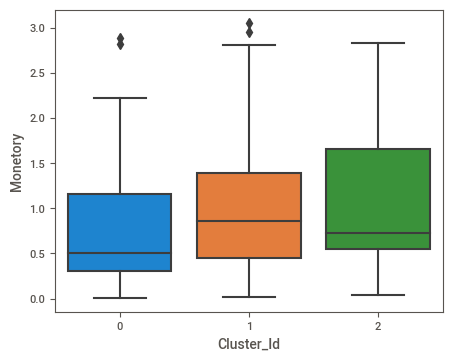

In [86]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Monetory', data=rfm_5)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

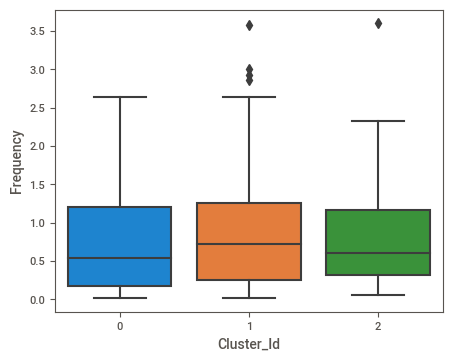

In [87]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm_5)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

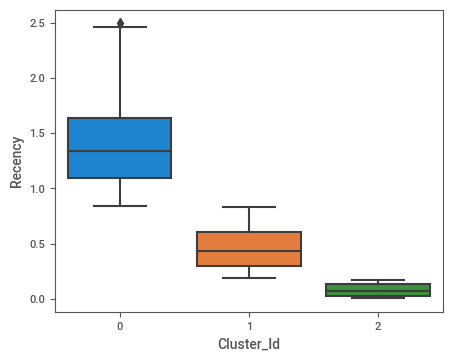

In [88]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_5)

Analysis of Results (K-Means clustering):

1. Customer with Cluster_id 0 has contributed the highest amount and least is the customers with Cluster_id 2.
2. The most frequent buyers are clients with Cluster-id 2.
3. Customers are not recent buyers of Cluster-id 2.

# DBSCAN - Density-Based Spatial Clustering of Applications with Noise

In [117]:
eps = 2 
min_samples = 5 

In [118]:
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')  # Euclidean distance is commonly used for RFM data

In [119]:
dbscan.fit(rfm_5 if 'rfm_5' in locals() else data[['Recency', 'Frequency', 'Monetory']])

DBSCAN(eps=2)

In [120]:
customer_segments = dbscan.labels_

In [121]:
# Analyze clusters:

# 1. Identify the number of clusters formed (excluding noise)
num_clusters = len(set(customer_segments)) - (1 if -1 in customer_segments else 0)
print(f"Number of clusters identified: {num_clusters}")

# 2. Analyze data points per cluster 
if num_clusters > 0:
  cluster_counts = customer_segments
  print("\nDistribution of customers across clusters:")
  print(cluster_counts)

# 3. Analyze cluster characteristics (average RFM values)
for cluster in range(num_clusters):
  cluster_data = rfm_5.loc[customer_segments == cluster]
  avg_recency = cluster_data['Recency'].mean()
  avg_frequency = cluster_data['Frequency'].mean()
  avg_monetary = cluster_data['Monetory'].mean()

  print(f"\nCluster {cluster+1} characteristics (average RFM):")
  print(f"  - Average Recency: {avg_recency:.2f}")
  print(f"  - Average Frequency: {avg_frequency:.2f}")
  print(f"  - Average Monetary Value: {avg_monetary:.2f}")

Number of clusters identified: 16

Distribution of customers across clusters:
[ 0 -1 -1  1 -1  2  1 -1 -1  3  4  5 -1 -1  6  7  3 -1 -1 -1  4  8 12  0
  9 -1 10 10 -1  4  7  9  5  2  5 -1 11  7 15  6  4  8 -1  4 12 12 14 -1
  2 15 -1 -1 10 15  8  2 -1 12 -1  1  4  9 13 14  0 -1 10 14  7  1  6  2
  9 10 -1 -1 -1 -1  9 -1  8  3 11 -1  3  4  6  0 -1 -1  4 12 -1 13 13 -1
  2  8 -1 11 12 12 14  7  1 -1  6 11 -1  2  4 -1 11  9 15 14 -1  6 -1 -1
 12 -1  3 15 -1 -1  9  0 -1  4 -1 -1 13  5 -1 -1  2  5 -1 -1 13  1 -1 -1
  9 -1 15 -1]

Cluster 1 characteristics (average RFM):
  - Average Recency: 1.61
  - Average Frequency: 0.32
  - Average Monetary Value: 0.25

Cluster 2 characteristics (average RFM):
  - Average Recency: 0.30
  - Average Frequency: 0.31
  - Average Monetary Value: 0.54

Cluster 3 characteristics (average RFM):
  - Average Recency: 1.82
  - Average Frequency: 0.06
  - Average Monetary Value: 0.39

Cluster 4 characteristics (average RFM):
  - Average Recency: 0.58
  - Average Fre

In [122]:
# silhouette score
silhouette_avg = silhouette_score(rfm_5, customer_segments)
print("The silhouette score is", format(silhouette_avg))

The silhouette score is 0.2515498971209373


Value is close to 0: The point is on the border between clusters and could be assigned to either.

<AxesSubplot:xlabel='customer_segments', ylabel='Monetory'>

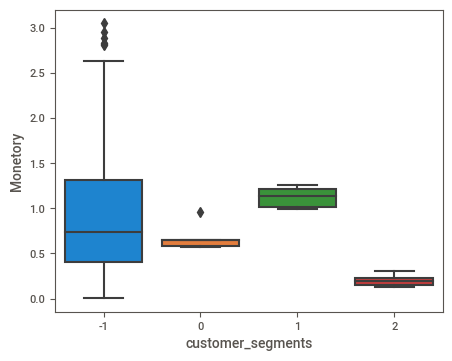

In [123]:
sns.boxplot(x='customer_segments', y='Monetory', data=rfm_5)

<AxesSubplot:xlabel='customer_segments', ylabel='Frequency'>

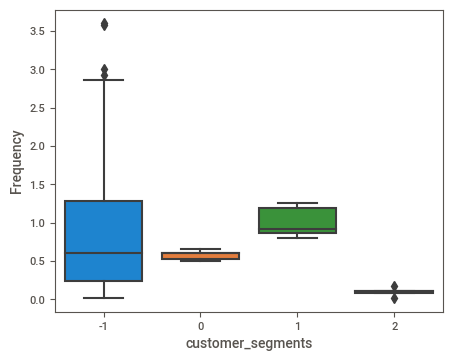

In [124]:
sns.boxplot(x='customer_segments', y='Frequency', data=rfm_5)

<AxesSubplot:xlabel='customer_segments', ylabel='Recency'>

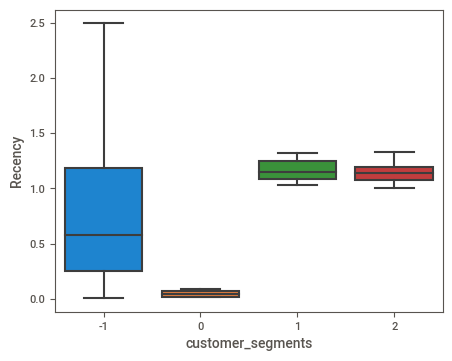

In [125]:
sns.boxplot(x='customer_segments', y='Recency', data=rfm_5)